In [15]:
# USAGE
# python train.py --dataset dataset

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import pandas as pd
np.random.seed(1337)

from keras.layers import *
from keras.models import * 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras,os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam



In [16]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("dataset"))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
    
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)



[INFO] loading images...


In [17]:
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)
labels



array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid'], dtype='<U6')

In [18]:

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [20]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.2, random_state=42)


In [21]:
# initialize the training data augmentation object

trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest",shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

In [22]:
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=8),
    steps_per_epoch=8,
    validation_data=(testX, testY),
    validation_steps=2,
    epochs=10,
    shuffle=False)



Epoch 1/10
8/8 [==============================] - 18s 2s/step - loss: 1.6953 - accuracy: 0.5156 - val_loss: 0.6717 - val_accuracy: 0.7000
Epoch 2/10
8/8 [==============================] - 16s 2s/step - loss: 0.6781 - accuracy: 0.6562 - val_loss: 0.6826 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 17s 2s/step - loss: 0.6594 - accuracy: 0.6406 - val_loss: 0.6628 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 17s 2s/step - loss: 0.5941 - accuracy: 0.6875 - val_loss: 0.5762 - val_accuracy: 0.9000
Epoch 5/10
8/8 [==============================] - 17s 2s/step - loss: 0.4481 - accuracy: 0.8438 - val_loss: 0.4547 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 17s 2s/step - loss: 0.3865 - accuracy: 0.8594 - val_loss: 0.3306 - val_accuracy: 0.9000
Epoch 7/10
8/8 [==============================] - 18s 2s/step - loss: 0.4216 - accuracy: 0.8438 - val_loss: 0.2025 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==================

In [27]:
#Getting summary
summary=H.history
print(summary)

predIdxs = model.predict_classes(testX)
predIdxs


{'val_loss': [0.67173171043396, 0.6825533390045166, 0.6628329873085022, 0.5761850118637085, 0.45469439029693604, 0.33055456876754763, 0.2025027096271515, 0.24735315442085265, 0.3024494767189026, 0.11018684804439545], 'val_accuracy': [0.699999988079071, 0.8999999761581421, 0.8999999761581421, 0.8999999761581421, 0.8999999761581421, 0.8999999761581421, 1.0, 1.0, 1.0, 0.8999999761581421], 'loss': [1.6952703967690468, 0.6780597493052483, 0.6594251915812492, 0.5941257476806641, 0.4480682201683521, 0.3864683788269758, 0.4216469619423151, 0.24977068696171045, 0.3534820256754756, 0.2084235865622759], 'accuracy': [0.515625, 0.65625, 0.640625, 0.6875, 0.84375, 0.859375, 0.84375, 0.921875, 0.828125, 0.953125]}


array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

## Model Evaluation

In [41]:
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

              precision    recall  f1-score   support

       covid       1.00      0.86      0.92         7
      normal       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



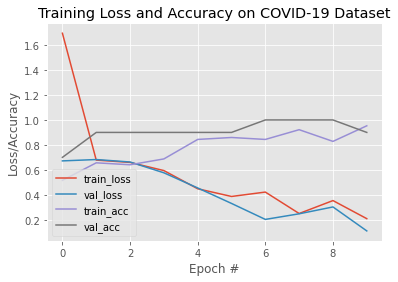

In [43]:
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


